In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## 2. Grouping songs together!

### 2.1 Getting your data!

1) Access to the data can be found here:

 - [echonest.csv](https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/echonest.csv)
 - [features.csv](https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/features.csv)
 - [tracks.csv](https://sapienza2021adm.s3.eu-south-1.amazonaws.com/hw4/tracks.csv)


2) Data Scientists are often challenged to do Data Wrangling. The latter is a process of cleaning and unifying messy and complex data sets for easy access and analysis ([see more info here](https://www.altair.com/what-is-data-wrangling/)). You are supposed to create one single data set by merging **tracks.csv**, **features.csv** and **echonest.csv**. It's your job to find the correct *key* to join your data sets together. You should end up with a data set of ~13K rows.

In [3]:
# read csv files
echonest = pd.read_csv("echonest.csv")
features = pd.read_csv("features.csv")
tracks = pd.read_csv("tracks.csv")

In [4]:
print(f'Echonest dataset shape: {echonest.shape}',
      f'Features dataset shape: {features.shape}',
      f'Tracks dataset shape: {tracks.shape}', sep = '\n')

Echonest dataset shape: (13129, 250)
Features dataset shape: (106574, 519)
Tracks dataset shape: (106574, 53)


### Explore datasets

#### Echonest dataset

In [5]:
echonest.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


This dataset contains info about some characteristics of the tracks.
There are info about the audio (acousticness, danceability, energy...), data about the album and the artist and then there are 224 continuous features called 'temporal_features'.

In [6]:
list(echonest.columns)

['track_id',
 'audio_features_acousticness',
 'audio_features_danceability',
 'audio_features_energy',
 'audio_features_instrumentalness',
 'audio_features_liveness',
 'audio_features_speechiness',
 'audio_features_tempo',
 'audio_features_valence',
 'metadata_album_date',
 'metadata_album_name',
 'metadata_artist_latitude',
 'metadata_artist_location',
 'metadata_artist_longitude',
 'metadata_artist_name',
 'metadata_release',
 'ranks_artist_discovery_rank',
 'ranks_artist_familiarity_rank',
 'ranks_artist_hotttnesss_rank',
 'ranks_song_currency_rank',
 'ranks_song_hotttnesss_rank',
 'social_features_artist_discovery',
 'social_features_artist_familiarity',
 'social_features_artist_hotttnesss',
 'social_features_song_currency',
 'social_features_song_hotttnesss',
 'temporal_features_000',
 'temporal_features_001',
 'temporal_features_002',
 'temporal_features_003',
 'temporal_features_004',
 'temporal_features_005',
 'temporal_features_006',
 'temporal_features_007',
 'temporal_featur

#### Features dataset

In [7]:
features.head()

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [8]:
list(features.columns)

['track_id',
 'chroma_cens_kurtosis_01',
 'chroma_cens_kurtosis_02',
 'chroma_cens_kurtosis_03',
 'chroma_cens_kurtosis_04',
 'chroma_cens_kurtosis_05',
 'chroma_cens_kurtosis_06',
 'chroma_cens_kurtosis_07',
 'chroma_cens_kurtosis_08',
 'chroma_cens_kurtosis_09',
 'chroma_cens_kurtosis_10',
 'chroma_cens_kurtosis_11',
 'chroma_cens_kurtosis_12',
 'chroma_cens_max_01',
 'chroma_cens_max_02',
 'chroma_cens_max_03',
 'chroma_cens_max_04',
 'chroma_cens_max_05',
 'chroma_cens_max_06',
 'chroma_cens_max_07',
 'chroma_cens_max_08',
 'chroma_cens_max_09',
 'chroma_cens_max_10',
 'chroma_cens_max_11',
 'chroma_cens_max_12',
 'chroma_cens_mean_01',
 'chroma_cens_mean_02',
 'chroma_cens_mean_03',
 'chroma_cens_mean_04',
 'chroma_cens_mean_05',
 'chroma_cens_mean_06',
 'chroma_cens_mean_07',
 'chroma_cens_mean_08',
 'chroma_cens_mean_09',
 'chroma_cens_mean_10',
 'chroma_cens_mean_11',
 'chroma_cens_mean_12',
 'chroma_cens_median_01',
 'chroma_cens_median_02',
 'chroma_cens_median_03',
 'chroma_

#### Tracks dataset

In [9]:
tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [10]:
list(tracks.columns)

['track_id',
 'album_comments',
 'album_date_created',
 'album_date_released',
 'album_engineer',
 'album_favorites',
 'album_id',
 'album_information',
 'album_listens',
 'album_producer',
 'album_tags',
 'album_title',
 'album_tracks',
 'album_type',
 'artist_active_year_begin',
 'artist_active_year_end',
 'artist_associated_labels',
 'artist_bio',
 'artist_comments',
 'artist_date_created',
 'artist_favorites',
 'artist_id',
 'artist_latitude',
 'artist_location',
 'artist_longitude',
 'artist_members',
 'artist_name',
 'artist_related_projects',
 'artist_tags',
 'artist_website',
 'artist_wikipedia_page',
 'set_split',
 'set_subset',
 'track_bit_rate',
 'track_comments',
 'track_composer',
 'track_date_created',
 'track_date_recorded',
 'track_duration',
 'track_favorites',
 'track_genre_top',
 'track_genres',
 'track_genres_all',
 'track_information',
 'track_interest',
 'track_language_code',
 'track_license',
 'track_listens',
 'track_lyricist',
 'track_number',
 'track_publishe

This dataset contains generic information about the tracks, like the album, the artist, the genre and so on.

### Merging

As we can see, the datasets contain different informations about the tracks.
Each of them contains the column `tracks_id` which is a number which identfies the tracks in unique way.
For this reason we can merge these three datasets on this column.

In [11]:
# check if there are missing values on track_id column
print(sum(echonest["track_id"].isnull()), sum(features["track_id"].isnull()),sum(tracks["track_id"].isnull()))

0 0 0


In [12]:
join_1 = tracks.merge(echonest, on='track_id', how='inner')

In [13]:
dataset = join_1.merge(features, on='track_id', how='inner') 

In [14]:
dataset.shape

(13129, 820)

The final dataset obtained contains `13129` rows and `820` columns.

It contains the same number of rows of `echonest`, which is the smallest dataset.

In [15]:
dataset.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800
4,134,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623


#### Missing values

There are some missing values in this dataset.

In [16]:
dataset.isna().sum().sort_values(ascending = False).head(40)

track_lyricist                   13055
track_publisher                  12977
artist_active_year_end           12635
track_composer                   12605
track_information                12310
artist_wikipedia_page            11898
artist_related_projects          11385
ranks_song_currency_rank         11096
ranks_song_hotttnesss_rank       10923
artist_associated_labels         10872
track_date_recorded              10714
metadata_album_date              10412
ranks_artist_hotttnesss_rank     10305
ranks_artist_discovery_rank      10304
ranks_artist_familiarity_rank    10304
metadata_album_name              10257
album_engineer                   10226
album_producer                   10184
artist_active_year_begin         10081
track_language_code               7306
artist_members                    6369
artist_latitude                   5077
artist_longitude                  5077
artist_location                   4046
album_date_released               3817
track_genre_top          

There are a lot of missing values in columns that refer to some generic informations about the tracks

___________

We see something strange in the columns `album_information` and `artist bio`. There are html symbols we want to delete like `<p>` and `</p>`

In [17]:
dataset['album_information']

0                                                  <p></p>
1                                                  <p></p>
2                                                  <p></p>
3                                                      NaN
4                                                  <p></p>
                               ...                        
13124    <p>"Do you know a word that means both look at...
13125    <p>"Do you know a word that means both look at...
13126    <p>"Do you know a word that means both look at...
13127    <p>"Do you know a word that means both look at...
13128                                                  NaN
Name: album_information, Length: 13129, dtype: object

In [18]:
dataset['album_information'] = dataset['album_information'].str.replace(r'<.*?>', '', regex=True)
dataset['artist_bio'] = dataset['artist_bio'].str.replace(r'<.*?>', '', regex=True)

In [19]:
dataset.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,,6073,NaN,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,,6073,NaN,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,,6073,NaN,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800
4,134,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,,6073,NaN,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623


Now this columns are cleaned.

______

Most of the variables of the dataset are numeric.

The qualitative variables are the following:

In [20]:
dataset.columns[dataset.dtypes == 'O']

Index(['album_date_created', 'album_date_released', 'album_engineer',
       'album_information', 'album_producer', 'album_tags', 'album_title',
       'album_type', 'artist_active_year_begin', 'artist_active_year_end',
       'artist_associated_labels', 'artist_bio', 'artist_date_created',
       'artist_location', 'artist_members', 'artist_name',
       'artist_related_projects', 'artist_tags', 'artist_website',
       'artist_wikipedia_page', 'set_split', 'set_subset', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_genre_top',
       'track_genres', 'track_genres_all', 'track_information',
       'track_language_code', 'track_license', 'track_lyricist',
       'track_publisher', 'track_tags', 'track_title', 'metadata_album_date',
       'metadata_album_name', 'metadata_artist_location',
       'metadata_artist_name', 'metadata_release'],
      dtype='object')

In [21]:
dataset[dataset.columns[dataset.dtypes == 'O']]

,album_date_created,album_date_released,album_engineer,album_information,album_producer,album_tags,album_title,album_type,artist_active_year_begin,artist_active_year_end,...,track_license,track_lyricist,track_publisher,track_tags,track_title,metadata_album_date,metadata_album_name,metadata_artist_location,metadata_artist_name,metadata_release
0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,,NaN,[],AWOL - A Way Of Life,Album,2006-01-01 00:00:00,NaN,...,Attribution-NonCommercial-ShareAlike 3.0 Inter...,NaN,NaN,[],Food,NaN,NaN,"Georgia, US",AWOL,AWOL - A Way Of Life
1,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,,NaN,[],AWOL - A Way Of Life,Album,2006-01-01 00:00:00,NaN,...,Attribution-NonCommercial-ShareAlike 3.0 Inter...,NaN,NaN,[],Electric Ave,NaN,NaN,"Georgia, US",AWOL,AWOL - A Way Of Life
2,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,,NaN,[],AWOL - A Way Of Life,Album,2006-01-01 00:00:00,NaN,...,Attribution-NonCommercial-ShareAlike 3.0 Inter...,NaN,NaN,[],This World,NaN,NaN,"Georgia, US",AWOL,AWOL - A Way Of Life
3,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,NaN,NaN,[],Constant Hitmaker,Album,NaN,NaN,...,Attribution-NonCommercial-NoDerivatives (aka M...,NaN,NaN,[],Freeway,2008-03-11,Constant Hitmaker,"Philadelphia, PA, US",Kurt Vile,Constant Hitmaker
4,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,,NaN,[],AWOL - A Way Of Life,Album,2006-01-01 00:00:00,NaN,...,Attribution-NonCommercial-ShareAlike 3.0 Inter...,NaN,NaN,[],Street Music,NaN,NaN,"Georgia, US",AWOL,AWOL - A Way Of Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,2015-09-09 14:39:58,2006-02-06 00:00:00,Daan Hendriks,"""Do you know a word that means both look at me...",Daan Hendriks,[],Do You Know The Word,Album,NaN,NaN,...,Attribution-Noncommercial-Share Alike 3.0 Unit...,NaN,NaN,[],I'm Wearing My Dancing Pants,NaN,NaN,Netherlands,Basic,Do You Know The Word
13125,2015-09-09 14:39:58,2006-02-06 00:00:00,Daan Hendriks,"""Do you know a word that means both look at me...",Daan Hendriks,[],Do You Know The Word,Album,NaN,NaN,...,Attribution-Noncommercial-Share Alike 3.0 Unit...,NaN,NaN,[],Me Funky You Jane,NaN,NaN,Netherlands,Basic,Do You Know The Word
13126,2015-09-09 14:39:58,2006-02-06 00:00:00,Daan Hendriks,"""Do you know a word that means both look at me...",Daan Hendriks,[],Do You Know The Word,Album,NaN,NaN,...,Attribution-Noncommercial-Share Alike 3.0 Unit...,NaN,NaN,[],Ain't Mad at Ya,NaN,NaN,Netherlands,Basic,Do You Know The Word
13127,2015-09-09 14:39:58,2006-02-06 00:00:00,Daan Hendriks,"""Do you know a word that means both look at me...",Daan Hendriks,[],Do You Know The Word,Album,NaN,NaN,...,Attribution-Noncommercial-Share Alike 3.0 Unit...,NaN,NaN,[],This Is Not the End,NaN,NaN,Netherlands,Basic,Do You Know The Word


#### Parsing dates

In [22]:
dataset[["album_date_created", "album_date_released", "metadata_album_date"]] = dataset[["album_date_created", "album_date_released", "metadata_album_date"]].apply(pd.to_datetime)
dataset[["artist_active_year_begin", "artist_active_year_end"]] = dataset[["artist_active_year_begin", "artist_active_year_end"]].apply(pd.to_datetime)

___________

We can divide numerical variables from categorical ones.

In [23]:
subset_str = dataset[dataset.columns[dataset.dtypes == 'O']]
subset_dates = dataset[dataset.columns[dataset.dtypes == '<M8[ns]']]

# categorical variables dataset
dataset_cat = pd.concat([subset_str, subset_dates], axis = 1)

# numerical variables dataset
dataset_num = dataset.drop(columns = dataset_cat.columns)

In [24]:
print(dataset_num.shape, dataset_cat.shape)

(13129, 780) (13129, 40)


We have 780 quantitative variables and only 40 qualitative variables.

### 2.2 Choose your features (variables)!

As you may notice, you have plenty of features to work with. So, you need to find a way to reduce the dimensionality (reduce the number of variables to work with). You can follow the next directions to achieve it:

1) Select **one** method for dimensionality reduction and apply it to your data. Some suggestions are Principal Component Analysis, Multiple Correspondence Analysis, Singular Value Decomposition, Factor Analysis for Mixed Data, Two-Steps clustering. Make sure that the method you choose is applicable for the features you have or modify your data to be able to use it. Explain why you chose that method and the limitations it may have.

HINT: We don't want to miss relevant variables like song's duration, language, etc., after the dimensionality reduction. To keep those variables, you can apply the dimensionality reduction method(s) on features coming from the same file. Later you can stack them with the variables selected from another file.

2) Apply the selected method(s) to your data. Make sure that the chosen method retains > 70% of the total variance. 

__________

In order to reduce the dimensionality of the data, we have chosen to use the **Principal Component Analysis**.


### PCA

PCA is commonly used for dimensionality reduction. 
It works by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.
In practise, it is an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.


PCA is designed for *continuous variables*, so we apply this method only on the subset of numerical variables contained in dataset.

First of all, we need to **standardize** numerical variables.

In [25]:
scaler = StandardScaler()

# select only numeric columns
cols = dataset_num.columns

# standardscaler on numeric columns
dataset_num[cols]=scaler.fit_transform(dataset_num[cols])
dataset_num.head()

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,artist_latitude,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,-1.175470,-0.293923,0.757754,-1.425406,-0.290607,-0.447065,-0.311831,-0.160959,-1.267184,-0.005532,...,-1.310092,-1.564443,-1.654377,-0.381721,0.393540,1.208676,1.035766,-0.594301,-0.378710,0.932033
1,-1.175436,-0.293923,0.757754,-1.425406,-0.290607,-0.447065,-0.311831,-0.160959,-1.267184,-0.005532,...,-1.021250,-1.202410,-0.608422,-0.439876,0.432798,1.168234,0.742018,-0.594301,-0.526657,1.267315
2,-1.175366,-0.293923,0.757754,-1.425406,-0.290607,-0.447065,-0.311831,-0.160959,-1.267184,-0.005532,...,-1.708717,-1.479675,-1.162289,-0.360920,-0.091584,-0.042573,-0.158812,-0.594301,-0.337701,0.226443
3,-1.175194,-0.293923,0.757754,-1.424298,0.503120,-0.860517,0.293227,0.823212,-1.266179,NaN,...,-0.707981,-0.520648,-1.317931,-0.071044,0.351477,0.896399,1.055350,-0.594301,0.197164,0.053735
4,-1.170910,-0.293923,0.757754,-1.425406,-0.290607,-0.447065,-0.311831,-0.160959,-1.267184,-0.005532,...,-1.171979,-0.817691,-0.965264,-0.402092,0.163596,0.390558,0.213270,-0.594301,-0.491219,0.641704


As we have seen before, there are a lot of NaN in this dataset. Let's see if there are in these columns.

In [26]:
nulls = dataset_num.isna().sum().sort_values(ascending = False).head(9) #removing NaN columns?
nulls

ranks_song_currency_rank         11096
ranks_song_hotttnesss_rank       10923
ranks_artist_hotttnesss_rank     10305
ranks_artist_familiarity_rank    10304
ranks_artist_discovery_rank      10304
artist_latitude                   5077
artist_longitude                  5077
metadata_artist_longitude         3359
metadata_artist_latitude          3359
dtype: int64

There are about 10K missing values in columns that tell us the rank of a song or of an artist. And less or more 4K/5K missing values on variables related to the artist's position. Do we really need these columns to detect the genre of a song? ...I don't think so. 
Terefore we have decided not to give them as input in the pca.

In [27]:
datasetpca = dataset_num.drop(columns = nulls.index)

In [28]:
datasetpca.head()

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,track_bit_rate,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,-1.175470,-0.293923,0.757754,-1.425406,-0.290607,-0.447065,-0.311831,-0.160959,-1.267184,0.116230,...,-1.310092,-1.564443,-1.654377,-0.381721,0.393540,1.208676,1.035766,-0.594301,-0.378710,0.932033
1,-1.175436,-0.293923,0.757754,-1.425406,-0.290607,-0.447065,-0.311831,-0.160959,-1.267184,0.116230,...,-1.021250,-1.202410,-0.608422,-0.439876,0.432798,1.168234,0.742018,-0.594301,-0.526657,1.267315
2,-1.175366,-0.293923,0.757754,-1.425406,-0.290607,-0.447065,-0.311831,-0.160959,-1.267184,0.116230,...,-1.708717,-1.479675,-1.162289,-0.360920,-0.091584,-0.042573,-0.158812,-0.594301,-0.337701,0.226443
3,-1.175194,-0.293923,0.757754,-1.424298,0.503120,-0.860517,0.293227,0.823212,-1.266179,-0.886405,...,-0.707981,-0.520648,-1.317931,-0.071044,0.351477,0.896399,1.055350,-0.594301,0.197164,0.053735
4,-1.170910,-0.293923,0.757754,-1.425406,-0.290607,-0.447065,-0.311831,-0.160959,-1.267184,0.116230,...,-1.171979,-0.817691,-0.965264,-0.402092,0.163596,0.390558,0.213270,-0.594301,-0.491219,0.641704


At the end we apply PCA on a dataset of 771 numerical columns.

The choice of the component to use it's not so easy, there are different methods that help us to choose them.
First of all we can plot the cumulative explained variance to see what is the number of components that cumulates at least 70% of the variance, which is our goal.

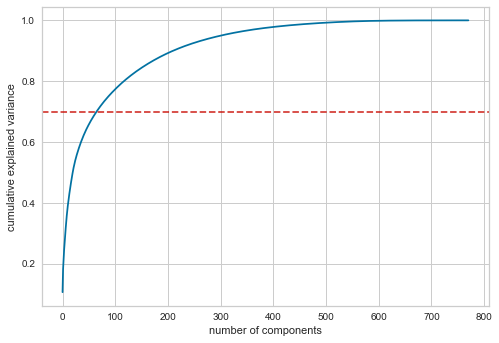

In [29]:
pca = PCA().fit(datasetpca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.7, color='r', linestyle='--', alpha = 0.8)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Another method suggests to select all the components that have eingivalues > 1.

In [30]:
# Kaiser criterion
len(pca.explained_variance_[pca.explained_variance_> 1])

135

Another way is to look at the screeplot, which tells us the proportion of variance explained by each component. The "elbow" of the graph where the eigenvalues seem to level off is found and factors or components to the left of this point should be retained as significant.

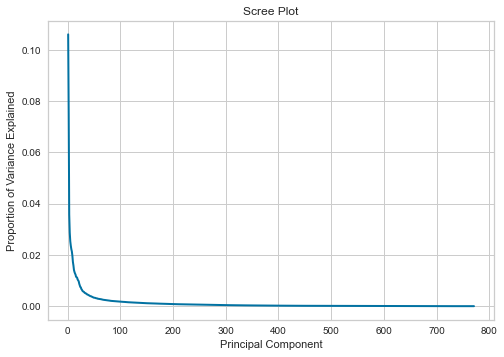

In [31]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, '-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

At the end we choose _ component, which cumulates _% of the variance.

In [32]:
pca = PCA(n_components = 135)
pca.fit(datasetpca)
print(sum(pca.explained_variance_ratio_))

0.822551483967033


In [33]:
cluster_df = pca.transform(datasetpca)

We want to cumulate at least 70% of the variance.

In [34]:
# # Loop Function to identify number of principal components that explain at least 70% of the variance

# for comp in range(3, datasetpca.shape[1]):
#     pca = PCA(n_components= comp, random_state=42)
#     pca.fit(datasetpca)
#     comp_check = pca.explained_variance_ratio_
#     final_comp = comp
#     if comp_check.sum() > 0.70:
#         break
        
# Final_PCA = PCA(n_components = final_comp, random_state=42)
# Final_PCA.fit(datasetpca)
# cluster_df = Final_PCA.transform(datasetpca)
# num_comps = comp_check.shape[0]

# print("Using {} components, we can explain {:.4f}% of the variability in the original data.".format(final_comp,comp_check.sum()))

In [35]:
cluster_df.shape

(13129, 135)

To retain > 70% of the total variance we have to choose at least 66 principal components.

Then the matrix of the scores forms our new dataset, composed of 13129 observations and 66 variables.

In [36]:
new_dataset = pd.DataFrame(cluster_df, columns = [f'Feature_{i}'for i in range(135)])
new_dataset

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_125,Feature_126,Feature_127,Feature_128,Feature_129,Feature_130,Feature_131,Feature_132,Feature_133,Feature_134
0,3.073617,-2.786541,-5.854690,4.225579,3.281861,1.947350,6.733975,-1.024416,-2.238759,4.242814,...,0.727533,0.485692,-0.792118,-0.041081,0.271885,-0.259765,-0.683858,-0.406513,0.879369,-0.779602
1,5.774832,-5.383521,-5.394346,-1.451803,-3.641586,2.733759,-1.530428,5.842357,-0.164494,4.251523,...,0.214012,-0.044370,-1.015798,-1.066439,0.305229,-0.023172,0.754532,-0.290426,0.875596,-0.700802
2,2.651693,-4.141337,-4.683326,0.084736,-2.855567,2.129076,-1.292526,-0.356319,-0.110296,1.744807,...,0.335802,1.338853,0.027589,-0.926919,-0.227655,0.965520,-0.124393,-0.227841,0.596643,-1.571143
3,9.102391,3.817893,-5.621358,0.842298,-1.350501,0.641833,-1.793329,4.080258,-0.550786,4.863287,...,-0.924441,0.921462,0.460836,-1.201467,-0.538298,-1.222938,-1.459643,0.682476,0.138728,1.592392
4,1.307966,-9.424425,-4.455790,0.984638,-3.984611,-1.215412,-2.939969,-2.190956,-0.518514,2.539085,...,-0.225751,1.468787,0.809553,1.143851,-0.374327,0.468639,1.124721,0.292455,0.134006,-1.171069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,7.730382,-5.771925,-0.832914,-1.886826,-1.811258,0.358932,1.327367,-0.824413,-1.059157,1.108091,...,-1.057703,-1.354565,0.188335,0.229739,-0.583664,-0.770494,-0.535785,0.584096,-0.847423,-0.244091
13125,15.124348,-5.181079,-1.226618,11.221039,-0.741803,-0.355500,-1.237457,-3.240435,0.563333,-4.166793,...,0.169101,-0.757383,0.340255,0.394537,0.226230,-0.467597,0.003464,-0.079411,-0.881207,-1.380035
13126,18.033584,-3.937322,-1.500753,4.581573,-1.746079,3.596378,4.685129,-4.790259,1.370813,-1.300543,...,-0.899751,-0.724845,1.174790,-0.185946,-0.082245,-0.266231,0.053863,0.028920,-0.058841,0.589030
13127,-2.904102,-1.745836,-0.034706,-6.444922,-1.278629,0.068738,3.397774,6.456409,0.891715,-0.353853,...,-0.795115,0.191263,0.456550,-0.209152,-0.309737,-0.933648,0.024697,-0.747768,-0.163667,0.664466


### 2.3 Clustering!

1) Implement the K-means clustering algorithm (**not** ++: random initialization). We ask you to write the algorithm from scratch following what you learned in class. 

2) Find an optimal number of clusters. Use at least two different methods. In case that your algorithms provide different optimal K's, select one of them and explain why you chose it.

3) Run the algorithm on the data that you got from the dimensionality reduction. 

4) Then, use the already implemented version of k-means++ (from the scikit-learn library). Explain the differences (if there are any) in the results.


#### 1) Implement K-means clustering algorithm from scratch

In [37]:
def my_kmeans(x, k, num_iterations, dist = 'euclidean'):
    '''
    function that calculates k-means algorithm
    x = data matrix
    k = number of clusters
    num_iterations = number of iterations
    dist = distance measure (default = 'eucledian')
    
    returns a np.array containg class of each data point
    '''
    x = np.array(x)
    
    # 1) choosing centroids at random
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :] 
     
    # 2) finding the distance between centroids and all the data points
    distances = cdist(x, centroids , dist) 
     
    # 3) take centroid with the minimum distance
    points = np.array([np.argmin(i) for i in distances])
     
    # 4) repeating the steps for a defined number of iterations:
   
    for i in range(num_iterations): 
        old_centr = centroids ##aggiunta
        
        centroids = []
        for idx in range(k):
            
            # taking the mean of cluster to get new centroids
            new_cent = x[points == idx].mean(axis=0) 
            centroids.append(new_cent)
 
        centroids = np.vstack(centroids) # updated centroids 
        
        # stop if centroids of newly formed clusters do not change
        if np.array_equal(centroids, old_centr):
            break
        
        distances = cdist(x, centroids, dist)
        points = np.array([np.argmin(i) for i in distances])
                
    return points 

#### 2) Find the optimal number of clusters

There are different ways to choose the optimal number of clusters. In this case we decide to implement **from scratch** the elbow method and the sihlouette method.

#####  Method I: Within cluster sum of squares - Elbow Method

The basic idea behind cluster partitioning methods is to define clusters such that the total intra-cluster variation is minimized.
So the K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares** criterion:

$\min\limits_{C_1 \dots C_k} \sum_{k=1}^{K}W(C_k) = \sum_{x \in C_k} \lVert x -\mu_k \rVert ^2$

Thus, we can use the following algorithm to define the optimal clusters:

1. Compute k-means algorithm for different values of k.
2. For each k, calculate the total within-cluster sum of square (wss)
3. Plot the curve of wss according to the number of clusters k.

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

For this reason we changed a little bit our kmeans algorithm in order to return the within sum of squares.

In [38]:
def my_kmeans2(x,k, num_iterations, dist = 'euclidean'):
    '''
    function that calculates k-means algorithm
    x = data matrix
    k = number of clusters
    num_iterations = number of iterations
    dist = distance measure (default = 'eucledian')
    
    returns a np.array containg class of each data point
    '''
    x = np.array(x)
    # 1) choosing centroids at random
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :] 
     
    # 2) finding the distance between centroids and all the data points
    distances = cdist(x, centroids , dist) 
     
    # 3) take centroid with the minimum distance
    points = np.array([np.argmin(i) for i in distances])
     
    # 4) repeating the steps for a defined number of iterations:
    for i in range(num_iterations): 
        old_centr = centroids ##aggiunta
        
        centroids = []
        for idx in range(k):
            
            # taking the mean of cluster to get new centroids
            new_cent = x[points == idx].mean(axis=0) 
            centroids.append(new_cent)
 
        centroids = np.vstack(centroids) # updated centroids 
        
        # stop if centroids of newly formed clusters do not change
        if np.array_equal(centroids,old_centr):
            break
        
        distances = cdist(x, centroids, dist)
        points = np.array([np.argmin(i) for i in distances])
    
    # distance of the points from the relative centroid
    inertia_ = sum(((i - centroids[c])**2).sum() for i, c in zip(x, points))
    return (points, inertia_, centroids)

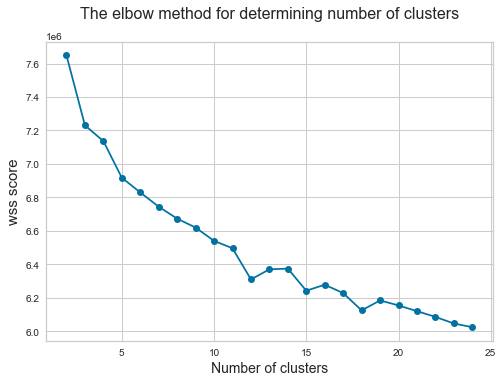

In [39]:
wss = []
for k in range(2,25):
    wss.append(my_kmeans2(new_dataset, k, 100)[1])
    
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("wss score",fontsize=15)
plt.plot(range(2,25), wss, marker = 'o'); plt.show()

This graph does not particularly highlight the presence of an 'elbow', we can see something in correspondence with k = 10.

##### Method II: Silhouette score

In the **average silhouette method**, a silhouette value for every datapoint is calculated, the mean of which is used to find the optimal number of clusters. 

The silhouette value represents how similar a datapoint is to its own cluster when compared to all the other clusters or cluster centroids. 
The value ranges from -1 to +1. 
A higher silhouette value implies that the datapoint is matched well to its own centroid/cluster and is not so well matched with other clusters. If the mean of the silhouette value measured for all the datapoints is considerably high, then it can be said that the number of clusters is at its optimal value, or in other words, the clustering structure is appropriate. On the other hand, if the mean silhouette value turns out to be very less or negative, then it means that the cluster structure is not proper, and it may be having either more or lesser number of clusters than the optimal value

The silhouette value of one data point $i$ is defined as $$s(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$$

$a(i)$ is the mean of the distance between the point $i$ and the points in the same clusters.

$b(i)$ is the smallest mean distance of $i$ to all points in any other cluster, of which $i$ is not a member.

In [40]:
def silhouettescore(data, clusters, centroids, k):
    cluster_data = data.copy()
    
    #add cluster label
    cluster_data['cluster'] = clusters
    sil =[]
    
    # for every cluster
    for c in range(k):
        # takes the observations in that cluster
        same_cluster = cluster_data[cluster_data.cluster == c]
        # for every point calculates the distance between that point and all the other points in the cluster
        for i in range(len(same_cluster)):
            a = cdist(same_cluster.iloc[i:i+1,:-1], cluster_data[cluster_data.cluster == c].iloc[:,:-1], 'euclidean')
            # a score is the mean of the distance
            a_mean = np.sum(a)/(len(same_cluster)-1)
            
            # calculates the distance between the point i and the centroids of all the clusters
            dist= cdist(same_cluster.iloc[i:i+1,:-1], centroids, 'euclidean')
            
            # takes the cluster with miminum distance
            nextcl = np.argsort(dist)[0][1]
            
            # calculates b as the mean of the distance between the point i and the nearest cluster points
            b = cdist(same_cluster.iloc[i:i+1,:-1], cluster_data[cluster_data.cluster == nextcl].iloc[:,:-1], 'euclidean')
            b_mean = np.mean(b)
            
            s = (b_mean - a_mean)/max(a_mean, b_mean)
            sil.append(s)

    return np.mean(sil)

In [41]:
clusters, inertia_, centroids = my_kmeans2(new_dataset, 4, 100)
silhouettescore(new_dataset, clusters, centroids, 4)

0.0567668788430636

In [ ]:
# run later

# from tqdm import tqdm
s = []
for k in range(2,20):
    clusters, inertia_, centroids = my_kmeans2(new_dataset, k, 100)
    s.append(silhouettescore(new_dataset, clusters, centroids, k))
    
plt.title("Silhouette Score\n",fontsize=16)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("silhouette score",fontsize=15)
plt.plot(range(2,20), s, marker = 'o'); plt.show()

In this case the graph tells us that the highest silhouette is reached with k = 2 clusters, but it's important to notice that the silhouette score is very low.

#### 3) Run the algorithm on the data that you got from the dimensionality reduction. 

In [ ]:
my_kmeans(new_dataset, 12, 100)

#### 4) Then, use the already implemented version of k-means++ 

In [ ]:
kmeans = KMeans(n_clusters=12, init='k-means++').fit(new_dataset)

Let's plot some method for determining the optimal number of clusters using k-means++:

##### WSS

In [ ]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k = (2,25), metric = "distortion")
visualizer.fit(new_dataset)
visualizer.show()

***Silhouette***

In [ ]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k = (2,25), metric = "silhouette")
visualizer.fit(new_dataset)
visualizer.show()

***Calinski Harabasz***

In [ ]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k = (2,25), metric = "calinski_harabasz")
visualizer.fit(new_dataset)
visualizer.show()

The results are quite similar to those of the k-means implemented above. The elbow method tells us that the optimal number of cluster is in corrispondence of k = 11, while the silhouette and the Calinski Harabasz method tell us that the optimal number is 2.

### 2.4 Analysing your results!

You are often encouraged to explain what are the main characteristics that your clusters have. This is called the *Characterizing Clusters* step. Thus, follow the next steps to do it:

In [ ]:
dataset_completed = pd.concat([new_dataset, dataset_cat], axis = 1)
dataset_completed.head()

#### 1) Select 5-10 variables (from the ones that you had before doing the dimensionality reduction step) you think are relevant to identify the genre of a song. For example, Duration, Language, Country, etc.

I think that some of the characteristics provided by the Spotify API could be relevant to identify the genre of a song.
So i choose 

1) `track_duration`: Duration of a track

2) `audio_features_acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic

3) `audio_features_danceability`: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity

4) `audio_features_energy`: Represents a perceptual measure of intensity and activity

5) `audio_features_instrumentalness`: Predicts whether a track contains no vocals

6) `audio_features_liveness`: Detects the presence of an audience in the recording

7) `audio_features_speechiness`: This detects the presence of spoken words in a track


<!-- 7) `audio_features_tempo` -->

<!-- 8) `audio_features_valence` -->

#### 2) If any of your selected variables are numerical (continuous or discrete), then categorize them into 4 categories.

We categorize the numeric ones into 4 categories:

In [ ]:
d = dataset[['track_duration','audio_features_acousticness','audio_features_danceability','audio_features_energy',
        'audio_features_instrumentalness', 'audio_features_liveness','audio_features_speechiness']]

pd.options.mode.chained_assignment = None  

##  discretize variables (in 4 categories)
for i in d.columns:
    d[i] = pd.qcut(d[i], q=4)
d

#### 3) With the selected variables, perform pivot tables. On the horizontal axis, you will have the clusters, and on the vertical axis, you will have the categories of each variable. Notice that you have to do one pivot table per variable.

#### 4) Calculate the percentage by column for each pivot table.

#### 5) Interpret the results for each pivot table.

In [ ]:
clusters = my_kmeans(new_dataset, 12, 100)

#### Pivot tables:

**track_duration**

In [ ]:
round(pd.crosstab(d.track_duration,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

In all clusters there is not a marked prevalence of one category over another, except for the first and second clusters in which category 1 is more present.

**audio_features_acousticness**

In [ ]:
round(pd.crosstab(d.audio_features_acousticness,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

In cluster 1,6 and 11 the first category is prevalent. We see a strong prevalence of the fourth category in cluster 2,5 and 7.

**audio_features_danceability**

In [ ]:
round(pd.crosstab(d.audio_features_danceability,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

For the feature danceability we observe that there is a prevalence of the first category in cluster 4 and 5 and the last category predominates in cluster 6.

**audio_features_energy**

In [ ]:
round(pd.crosstab(d.audio_features_energy,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

For the clusters 0,1,4 and 11 the last category is the more prevalent. The first category predominates cluster 2,5 with an high prevalence. Less in the cluster 10. 

**audio_features_instrumentalness**

In [ ]:
round(pd.crosstab(d.audio_features_instrumentalness,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

For this variable there is no particular prevalence of a category into a cluster, except for cluster 5, which has 60% observation of the fourth category

**audio_features_liveness**

In [ ]:
round(pd.crosstab(d.audio_features_liveness,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

The last category is prevalent in cluster 7, less in cluster 0. In the other cluster there is no particular predominance.

**audio_features_speechiness**

In [ ]:
round(pd.crosstab(d.audio_features_speechiness,clusters, normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

The first category is prevalent in cluster 8 and 10.
Cluster 6 is composed from 60% of observations of the last category. 

____________________

#### 6) Now, it's time to compare the obtained clusters to the reality genre. Us it to answer what is the most representative genre for each one of the clusters?. You can answer this using the same methodology proposed in step 4th.

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Number of observation per genre')
ax = sns.countplot(x="track_genre_top", order = dataset['track_genre_top'].value_counts().index, data=dataset)

In [ ]:
kmeans = KMeans(n_clusters=12, init='k-means++').fit(new_dataset)

Finally, there is the variable we want to predict: Genre

In [ ]:
round(pd.crosstab(dataset.track_genre_top ,kmeans.labels_,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

There are some genres that do not prevail in any cluster, like *Blues, Experimental, Hip-Hop, Instrumental, International, Jazz, Old-Time/Historic* and *pop*.

The genres that are more prevalent in the mayority of clusters are Rock and Electronic.
It can be immediately noticed that cluster 11 contains only observations with Electronic genre. 
Rock genre is the most prevalent in cluster 1,2,4,5,7 and 11.
This is because these two genres have more occurencies in the dataset.

____________

#### 7) Execute your K-means++ Analysis again, but don't use the variables from **echonest.csv**. It will leave you with ~100K songs. Focus on getting the following results:
- Perform the dimensionality reduction.
- Find the optimal number of clusters.
- Characterize your clusters using 5-10 variables.
- Compare your results with those of the previous exercise. If you could choose, would you rather collect more observations (with fewer features) or fewer observations (with more features) based on the previous analyses?



We create a dataset without`echonest` features.

In [ ]:
dataset2 = tracks.merge(features, on='track_id', how='inner')

In [ ]:
dataset2.shape

Now we have a dataset of `10657` rows and `571` columns.

Since we have more observation than before let's explore missing values.

In [ ]:
dataset2.isna().sum().sort_values(ascending = False).head(30)

**Cleaning:**

In [ ]:
dataset2['album_information'] = dataset2['album_information'].str.replace(r'<.*?>', '', regex=True)
dataset2['artist_bio'] = dataset2['artist_bio'].str.replace(r'<.*?>', '', regex=True)
## other strings

In [ ]:
# categorical variables dataset
dataset2_cat = dataset2[dataset2.columns[dataset2.dtypes == 'O']]

# numerical variables dataset
dataset2_num = dataset2.drop(columns = dataset2_cat.columns)

In [ ]:
print(dataset2_num.shape, dataset2_cat.shape)

As before, we standardize the numeric variables and use them as input of the PCA, for dimensionality reduction.

In [ ]:
cols = dataset2_num.columns
scaler = StandardScaler()
# standardscaler on numeric columns
dataset2_num[cols]=scaler.fit_transform(dataset2_num[cols])
dataset2_num.head()

In [ ]:
nulls = dataset2_num.isna().sum().sort_values(ascending = False).head(9) #removing NaN columns?
datasetpca2 = dataset2_num.drop(columns = nulls.index)
datasetpca2.shape

In [ ]:
pca = PCA().fit(datasetpca2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.7, color='r', linestyle='--', alpha = 0.8)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca2 = PCA(n_components = 60)
pca2.fit(datasetpca2)
print(sum(pca2.explained_variance_ratio_))

In [ ]:
len(pca2.explained_variance_[pca2.explained_variance_> 1])

In [ ]:
cluster_df2 = pca2.transform(datasetpca2)

In [ ]:
new_dataset2 = new_dataset = pd.DataFrame(cluster_df2, columns = [f'Feature_{i}'for i in range(60)])
new_dataset2

The new dataset has `106574` rows and `60` columns.

#### Optimal number of k

##### WSS

In [ ]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k = (2,20), metric = "distortion")
visualizer.fit(new_dataset2)
visualizer.show()

***Silhouette***

In [ ]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k = (2,20), metric = "silhouette")
visualizer.fit(new_dataset2)
visualizer.show()

The elbow plot tells us that the optimal value for k is 12, while the silhouette tells us that it is k = 2. Despite this, we have a silhouette value close to zero, which in any case does not indicate good partitioning. So we choose as optimal k = 12.

#### Characterizing Clusters step

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Number of observation per genre')
ax = sns.countplot(x="track_genre_top", order = dataset2['track_genre_top'].value_counts().index, data=dataset2)

There are a lot of observation with genre *Rock, Experimental* and *Electronic* and very few with genre *Easy Listening, Blues, Soul, Country, Spoken, Historic* and *Jazz*.

In [ ]:
kmeans2 = KMeans(n_clusters=12, init='k-means++').fit(new_dataset2)
clusters = kmeans2.labels_

In this dataset we don't have the same variables as before, so we choose 5 columns to use for characterizing.
They are:

1)`track_duration`: Duration of a track

2)`track_listens`: Number of listens of a track

3)`track_bit_rate`: Bitrate is the term used to describe the amount of data being transferred into audio

4)`zcr_median_01`: Zero-Crossing Rate of an audio frame is the rate of sign-changes of the signal during the frame. 

5)`track_language_code`: The language of a track

In [ ]:
d2 = dataset2[['track_duration','track_listens','track_bit_rate','zcr_median_01']]

pd.options.mode.chained_assignment = None  

##  discretize variables (in 4 categories)
for i in d2.columns:
    d2[i] = pd.qcut(d2[i], q=4)
d2

#### Pivot tables:

**track_duration**

In [ ]:
round(pd.crosstab(d2.track_duration,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

We note that cluster 8 is composed only of observations of the third category. The first category is prevalent in cluster 3,4,5,11 and 12.

**track_listens**

In [ ]:
round(pd.crosstab(d2.track_listens,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

In this case cluster 8 is composed only of observations of the first category. Cluster 2 is dominated by both category one and category two; in cluster 11 the second category is more prevalent. For the rest there is no particular prevalence.

**track_bit_rate**

In [ ]:
round(pd.crosstab(d2.track_bit_rate,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

Also in this case cluster 8 is composed only of observations of the third category, which is the most prevalent in every cluster.

**zcr_median**

In [ ]:
round(pd.crosstab(d2.zcr_median_01,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

Here we see that category one is prevalent in both cluster 3 and 9. This category characterizes also cluster 1.
Cluster 11 is dominated by the last category.

**track_language_code**

In [ ]:
round(pd.crosstab(dataset2.track_language_code,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

It's evident that for the variable language it's prevalent the category 'english' for every cluster, since it is the most used language.

____________

In [ ]:
round(pd.crosstab(dataset2.track_genre_top ,clusters,  normalize = 'columns')*100,2).rename({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6', 6: 'Cluster 7',
                    7: 'Cluster 8', 8: 'Cluster 9', 9: 'Cluster 10', 10: 'Cluster 11', 11: 'Cluster 12',}, axis=1)

In this case we can see that there are only some genres that characterize the clusters.
Electronic, Experimental and Rock are the most prevalent genres, the others doesn't predominate in any cluster.

**Compare your results with those of the previous exercise. If you could choose, would you rather collect more observations (with fewer features) or fewer observations (with more features) based on the previous analyses?**

In principle, it may seem reasonable to think that using more information, and therefore more variables, can lead to better results in the analysis. This would suggest that, if there are a large number of variables available, an appropriate approach would be to use them all collectively so as not to lose useful information. In practice, however, many variables may be redundant or may not contain useful information for grouping purposes. In some cases we can resolve this problem with dimensionality reduction such as PCA, like we did before.

Another facet of the so-called "curse of dimensionality" is *Distance Concentration*. 
Distance concentration refers to the problem of all the pairwise distances between different samples/points in the space converging to the same value as the dimensionality of the data increases. Several machine learning models such as clustering use distance-based metrics to identify similar or proximity of the samples. Due to distance concentration, the concept of proximity or similarity of the samples may not be qualitatively relevant in higher dimensions.

So if we use a lot of variables maybe there would be no improvement but, often, there would be a situation where these variables would worsen the results. 
So I would rather collect more observation with fewer features.